# Unsupervised Learning Final

Project Topic

I am analyzing over a million entries of social media and health data by using unsupervised K means/and Principal Component Analysis to group them into meaningful categories and groups. I want to see the relationships between the features and learn what features determine health or high social media usage. 

I will then use a supervised model to predict stress levels (between 1-40) based on PCA feeding into a linear regression model.

Data

Rocky. (2025). Social Media User Analysis. Kaggle.com. https://www.kaggle.com/datasets/rockyt07/social-media-user-analysis

The dataset is extremely large.  There are is 1547896 entires along with 57 features.  There are 38 numerical features (37 if you drop user ID) . There are 20 object features where some are ordinal and others are purely nominal.  The data however is very clean and does not have any null values however it is a synthetic data set.

Data Cleaning/EDA

I did a describe and info on all the data. I also looked at all the objects and what unique values they had. Some objects were nominal like gender or country while most of the objects were ordinal.

For a first pass to get to a quick kmeans k's I dropped the objects. I then sent them all through the standard scaler in order to not overvalue/overweight a feature with large numbers.

I started trying to replace the objects with ordinal or nominal encoding but when i was running correlation alaysis these objects appeared to be 'plugs' and not meaningful. (I did extensive work to try and tie people that favored fitness content would have better health outcomes but the health outcomes were the same in every content prefernce)

I droped app name due to the only value being 'instagram' as well as user ID where where it was just the index of the row.  When I left user ID in the k-means used it and grouped user ids that were close to one another which is not a true correlation. 

I also expected that high stress would be closely tied to high usage.

K means results

I seperated k means with as many as five groups. I found the k of 3 served as a meaningful seperation of the data. Category 2 in kmeans had very strong correlations between elevated stress and long time using the app on reels and messages and slighlty younger age.  The first category was kind of like the average user category they dont spend as much time as category 2 on the app and their health data is pretty close to the mean.  The thrid group showed exellent health data and very low stress a strong correlation of using the app much less then the other two categories.  They also leaned closer to an older average user.

PCA  results

I wanted to use PCA to determine a linear regression model of stress. I was able to find the right number of parameters to be able to get near the users stress level from 1-40 without overfitting. Afeter running a loop of every possible PCA compenent (1-36) I determined that the 18th and 19th componet provided the elbow or best fit by improving the RMSE the most before more the pca's after had little to no impact on improving the score.

Conclusion

Data selection is important, synthetic data can be produced without true correlation between features. 
I spent a large amount of time trying to predict health outcomes based on content preferences with getting really poor reults.
        I should have split the data early and described (while filtering categories) to see that a lot of the categorical features were 'plugs' rather than meaniful.
I could have spent more time on EDA and data cleaning (removing user id, instagram, categorical plugs' as it can cause pain in the future when models are not producing predictible and stable results. 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
df = pd.read_csv("/Users/kevinwalker/Downloads/archive (3)/instagram_users_lifestyle.csv")

# EDA

In [40]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
user_id,1547896.0,773948.50,446839.23,1.00,386974.75,773948.5,1160922.25,1547896.00
age,1547896.0,38.99,15.29,13.00,26.00,39.0,52.00,65.00
exercise_hours_per_week,1547896.0,7.14,3.99,0.00,4.00,6.6,9.70,24.10
sleep_hours_per_night,1547896.0,7.00,1.10,3.00,6.30,7.0,7.70,10.00
perceived_stress_score,1547896.0,19.99,11.83,0.00,10.00,20.0,30.00,40.00
self_reported_happiness,1547896.0,5.50,2.87,1.00,3.00,5.0,8.00,10.00
body_mass_index,1547896.0,25.00,3.98,15.00,22.30,25.0,27.70,45.00
blood_pressure_systolic,1547896.0,124.49,20.21,90.00,107.00,124.0,142.00,159.00
blood_pressure_diastolic,1547896.0,79.50,11.55,60.00,70.00,79.0,90.00,99.00
daily_steps_count,1547896.0,8000.10,89.40,7566.00,7940.00,8000.0,8060.00,8473.00


In [41]:
df.info()
df.describe()
df[35:36]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
35,36,Instagram,40,Male,Australia,Urban,Upper-middle,Full-time employed,Bachelor’s,Divorced,...,2025-10-23,18.0,Mixed,Fitness,Friends only,Yes,No,0,Free,1.17


In [42]:
# Droping app name as they are all 'instagram'
df.app_name.unique()
df = df.drop(['app_name'],axis=1)

In [43]:
#categorical
df.perceived_stress_score.unique()


array([ 3,  1,  4, 18, 19, 23, 33, 12, 25, 14, 15,  7, 31,  2, 37, 40, 20,
        6, 10, 22, 30,  0, 26, 27, 32, 17, 39, 35, 11, 34,  8, 38, 29, 21,
       36,  5, 24, 28,  9, 16, 13])

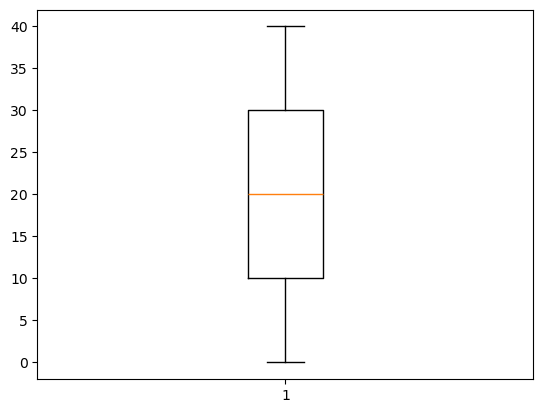

In [44]:
#print(['perceived_stress_score'][:5])

plt.boxplot(df.perceived_stress_score)
plt.show()

In [45]:
df.education_level.unique()
#ordinal

array(['Bachelor’s', 'Other', 'Master’s', 'High school', 'Some college',
       'Secondary', 'PhD', 'High School', 'Bachelor'], dtype=object)

In [46]:
df.income_level.unique()

array(['High', 'Middle', 'Upper-middle', 'Lower-middle', 'Low'],
      dtype=object)

In [47]:
df.diet_quality.unique()
#ordinal

array(['Good', 'Very poor', 'Poor', 'Average', 'Excellent'], dtype=object)

In [48]:
df.smoking.unique()
#cat

array(['No', 'Yes', 'Former'], dtype=object)

In [49]:
df.alcohol_frequency.unique()
#ordinal

array(['Rarely', 'Never', 'Several times a week', 'Weekly', 'Daily'],
      dtype=object)

In [50]:
df.has_children.unique()

array(['No', 'Yes'], dtype=object)

In [51]:
#no null values 

np.sum(df.isnull().any())

np.int64(0)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
#SCALING DATA
#due to poor correlations from sythentic data I removed objects and then scaled all the numerical data.

#dropped user name as it was it was correlating users based on ID number ie 5 with 6 or 1355 with 1356 etc

df_no_objects = df.select_dtypes(exclude = object)
df_no_objects1 = df_no_objects.drop(['user_id'],axis=1)
#print(df_no_objects1[:0])
scaler = StandardScaler()
numeric_scaled = StandardScaler()
numeric_scaled.fit(df_no_objects1)
dfno=numeric_scaled.transform(df_no_objects1)
dfno = pd.DataFrame(dfno, columns = ['age', 'exercise_hours_per_week', 'sleep_hours_per_night', 'perceived_stress_score', 'self_reported_happiness', 'body_mass_index', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'daily_steps_count', 'weekly_work_hours', 'hobbies_count', 'social_events_per_month', 'books_read_per_year', 'volunteer_hours_per_month', 'travel_frequency_per_year', 'daily_active_minutes_instagram', 'sessions_per_day', 'posts_created_per_week', 'reels_watched_per_day', 'stories_viewed_per_day', 'likes_given_per_day', 'comments_written_per_day', 'dms_sent_per_week', 'dms_received_per_week', 'ads_viewed_per_day', 'ads_clicked_per_day', 'time_on_feed_per_day', 'time_on_explore_per_day', 'time_on_messages_per_day', 'time_on_reels_per_day', 'followers_count', 'following_count', 'notification_response_rate', 'account_creation_year', 'average_session_length_minutes', 'linked_accounts_count', 'user_engagement_score'])
print('Scaled data preview')
print( dfno)

Scaled data preview
              age  exercise_hours_per_week  sleep_hours_per_night  \
0        0.785547                 0.014149               0.638609   
1        1.635524                 0.940410               1.458955   
2        0.131718                -0.536601              -0.272887   
3       -0.783643                 0.865308              -0.455187   
4        1.047078                 0.139320              -0.181738   
...           ...                      ...                    ...   
1547891  1.439375                -0.786941               1.367805   
1547892  0.197101                -1.012248              -0.819785   
1547893 -0.456728                -0.686805              -0.546336   
1547894 -1.633620                 1.816603              -0.455187   
1547895 -1.110557                -0.937146              -0.272887   

         perceived_stress_score  self_reported_happiness  body_mass_index  \
0                     -1.435676                 0.870775        -1.056499 

# K MEANS Model

In [54]:
from sklearn.cluster import KMeans

In [55]:
no_object_K = KMeans(n_clusters=3,random_state =25,max_iter =500)

In [56]:
no_object_K.fit_predict(dfno)


scaled_centroids= no_object_K.cluster_centers_
centroids_3 = numeric_scaled.fit(scaled_centroids).inverse_transform(scaled_centroids) 
centdf= pd.DataFrame(centroids_3,columns = dfno.columns)
print(centdf.T.round(3))

                                    0      1      2
age                             0.022 -0.040  0.082
exercise_hours_per_week        -0.000 -0.000 -0.000
sleep_hours_per_night           0.000  0.000  0.000
perceived_stress_score         -0.141  0.726 -0.929
self_reported_happiness         0.031 -0.097  0.182
body_mass_index                 0.000  0.000  0.000
blood_pressure_systolic        -0.000 -0.000 -0.000
blood_pressure_diastolic       -0.000 -0.000 -0.000
daily_steps_count               0.000  0.000  0.000
weekly_work_hours               0.008 -0.005  0.018
hobbies_count                  -0.000 -0.000 -0.000
social_events_per_month        -0.000 -0.000 -0.000
books_read_per_year            -0.000 -0.000 -0.000
volunteer_hours_per_month       0.000  0.000  0.000
travel_frequency_per_year       0.000  0.000  0.000
daily_active_minutes_instagram -0.180  1.008 -1.261
sessions_per_day               -0.142  0.595 -0.725
posts_created_per_week         -0.131  0.354 -0.350
reels_watche

In [57]:
centdf[0:3]

,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,weekly_work_hours,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
0,0.022180,-0.000054,0.000180,-0.140888,0.031312,0.000136,-0.000204,-0.000102,0.000018,0.008409,...,-0.156810,-0.162153,-0.168945,-0.006368,-0.007598,0.000123,-0.006403,0.004744,-0.000084,-0.094001
1,-0.039735,-0.000054,0.000176,0.726405,-0.096835,0.000138,-0.000206,-0.000102,0.000018,-0.004999,...,0.778352,0.828392,0.891547,0.005713,0.007367,0.000123,0.001879,-0.014903,-0.000085,-0.124692
2,0.081870,-0.000055,0.000185,-0.929347,0.181878,0.000139,-0.000209,-0.000103,0.000018,0.017810,...,-0.972385,-1.035505,-1.114538,-0.010365,-0.012955,0.000124,-0.012534,-0.104098,-0.000085,0.564246


# PREDICTING HEALTH OUTCOMES FROM CONTENT PREFERENCES ie FITNESS

In [58]:
# hypthosis failed as lack of correlation between type of content preferences
fitness_only =dfno[df['preferred_content_theme'] == 'Fitness']
#tech_only =dfno[ df['preferred_content_theme'] != 'Tech']
print(fitness_only.describe().round(2))

             age  exercise_hours_per_week  sleep_hours_per_night  \
count  194543.00                194543.00              194543.00   
mean        0.00                     0.00                  -0.00   
std         1.00                     1.00                   1.00   
min        -1.70                    -1.79                  -3.65   
25%        -0.85                    -0.79                  -0.64   
50%         0.00                    -0.14                   0.00   
75%         0.85                     0.67                   0.64   
max         1.70                     4.17                   2.74   

       perceived_stress_score  self_reported_happiness  body_mass_index  \
count               194543.00                194543.00        194543.00   
mean                     0.00                     0.00            -0.00   
std                      1.00                     1.00             1.00   
min                     -1.69                    -1.57            -2.52   
25%         

In [59]:
tech_only =dfno[ df['preferred_content_theme'] == 'Tech']
print(tech_only.describe().round(2))


             age  exercise_hours_per_week  sleep_hours_per_night  \
count  193712.00                193712.00              193712.00   
mean       -0.00                     0.00                   0.00   
std         1.00                     1.00                   1.00   
min        -1.70                    -1.79                  -3.65   
25%        -0.85                    -0.79                  -0.64   
50%         0.00                    -0.14                   0.00   
75%         0.85                     0.67                   0.64   
max         1.70                     4.24                   2.74   

       perceived_stress_score  self_reported_happiness  body_mass_index  \
count               193712.00                193712.00        193712.00   
mean                     0.00                     0.00             0.00   
std                      1.00                     1.00             1.00   
min                     -1.69                    -1.57            -2.52   
25%         

# PCA Exploration

In [60]:
pca_all = PCA(n_components=37)

In [61]:
pca_all_fit_t = pca_all.fit_transform(dfno)

In [62]:
print(pca_all.explained_variance_ratio_.round(2))
print(np.sum(pca_all.explained_variance_ratio_))

[0.35 0.05 0.04 0.04 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 0.03 0.03 0.03 0.03 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
1.0


# PREDICTING STRESS SCORE FROM PCA COMPONETS

In [63]:
# Removing y_trues of stress score
dfno_wo_stress =dfno.drop(['perceived_stress_score'],axis=1)
print(dfno_wo_stress.head())

        age  exercise_hours_per_week  sleep_hours_per_night  \
0  0.785547                 0.014149               0.638609   
1  1.635524                 0.940410               1.458955   
2  0.131718                -0.536601              -0.272887   
3 -0.783643                 0.865308              -0.455187   
4  1.047078                 0.139320              -0.181738   

   self_reported_happiness  body_mass_index  blood_pressure_systolic  \
0                 0.870775        -1.056499                 1.163374   
1                -1.567204        -0.377456                 0.421057   
2                 1.567340         0.905180                 0.520032   
3                -1.567204        -0.628954                -0.964603   
4                -1.567204         0.779431                 1.064399   

   blood_pressure_diastolic  daily_steps_count  weekly_work_hours  \
0                  0.562826           1.195731           0.906991   
1                  0.389647           0.658803    

In [64]:
stress_LR = LinearRegression()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(dfno_wo_stress,df['perceived_stress_score'],test_size=.2,random_state = 27)

In [66]:
pca_comp = np.arange(1,37)

print(pca_comp)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


[{0.6505600896280426, np.int64(1), np.float64(6.996682168368026)}, {0.6699933534726035, np.int64(2), np.float64(6.799347488863123)}, {0.6738850526788699, np.int64(3), np.float64(6.759136948838834)}, {0.6760873683418562, np.int64(4), np.float64(6.736275423959489)}, {0.6760874472839258, np.int64(5), np.float64(6.7362746030968506)}, {0.6760859174224424, np.int64(6), np.float64(6.736290511024471)}, {0.676085646228369, np.float64(6.736293330972383), np.int64(7)}, {np.int64(8), 0.6760872795154621, np.float64(6.736276347602096)}, {0.6760868507067289, np.int64(9), np.float64(6.73628080647788)}, {0.676089571218844, np.int64(10), np.float64(6.7362525177652035)}, {0.6760885909646084, np.int64(11), np.float64(6.736262710760675)}, {0.6760954052565279, np.int64(12), np.float64(6.736191853265847)}, {0.6760967836382672, np.int64(13), np.float64(6.7361775202587335)}, {0.6760960511908923, np.int64(14), np.float64(6.7361851365658625)}, {0.6760957463054464, np.float64(6.736188306895111), np.int64(15)}, {n

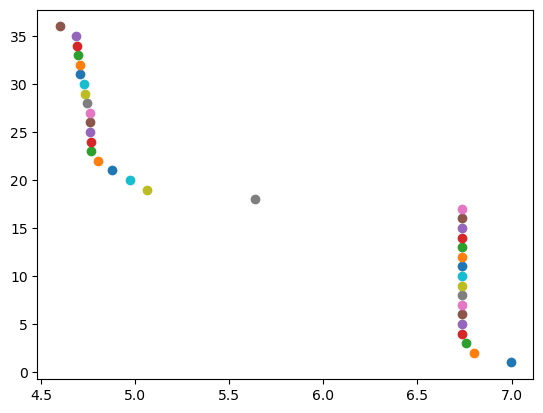

In [67]:
result = []

for n in pca_comp:
    pca =PCA(n_components=n)
    X_train_p = pca.fit_transform(X_train)
    X_test_p = pca.transform(X_test)
    stress_LR.fit(X_train_p,y_train)
    y_pred = stress_LR.predict(X_test_p)
    R2 = stress_LR.score(X_test_p,y_test)
    rmse= np.sqrt((np.mean((y_pred-y_test)**2)))
    result.append({n,R2,rmse})
    #plt.scatter(R2,n)
    plt.scatter(rmse,n)
print(result)

# PCA componets had a slow improvement of predicting stress score and made strong leaps at 18 and 19, to reduce overfitting for new test data, should fit data based on only ~ 19 components even though more components improved score